In [15]:
from Task1 import * # contains our functions. see Task1.py for full source code :)
import time
import random
import matplotlib.pyplot as plt
import seaborn as sns
from memory_profiler import profile
%load_ext memory_profiler
%load_ext memray
sns.set_theme()

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
The memray extension is already loaded. To reload it, use:
  %reload_ext memray


## `Task1` Functions:

---

### `linearSearchIterative(sourceList, target)`

**Description:**

Finds the target within the `sourceList` using the linear search method iteratively.

**Parameters:**

- `sourceList` (`list`): A list of `int` values.
- `target` (`int`): The `int` value that will be searched for.

**Returns:**

- If the `target` is found, the index of the `sourceList` is returned.
- Returns `False` otherwise.


Sure, I'll format the docstrings of your three search functions into Markdown:

---

### `linearSearchRecursive(sourceList, target, index=0)`

**Description:**

Finds the target within the `sourceList` using the linear search method recursively.

**Parameters:**

- `sourceList` (`list`): A list of `int` values.
- `target` (`int`): The `int` value that will be searched for.
- `index` (`int`, optional): The starting index for the recursive search. Default is 0.

**Returns:**

- If the `target` is found, the index of the `sourceList` is returned.
- Returns `False` otherwise.

---

### `binarySearchIterative(sourceList, target)`

**Description:**

Uses binary search to find the target within a sorted list, employing an iterative approach.

**Parameters:**

- `sourceList` (`list`): A sorted list of `int` values.
- `target` (`int`): The `int` value that will be searched for.

**Returns:**

- Returns the position of the target, if found.
- Returns `False` otherwise.

---

### `binarySearchRecursive(sourceList, target, left=0, right=None)`

**Description:**

Uses binary search to find the target within a sorted list, employing a recursive approach.

**Parameters:**

- `sourceList` (`list`): A sorted list of `int` values.
- `target` (`int`): The `int` value that will be searched for.
- `left` (`int`, optional): The starting index of the sublist to search within. Default is 0.
- `right` (`int`, optional): The ending index of the sublist to search within. Default is the last index of the list unless specified.

**Returns:**

- Returns the position of the target, if found.
- Returns `False` otherwise.

---

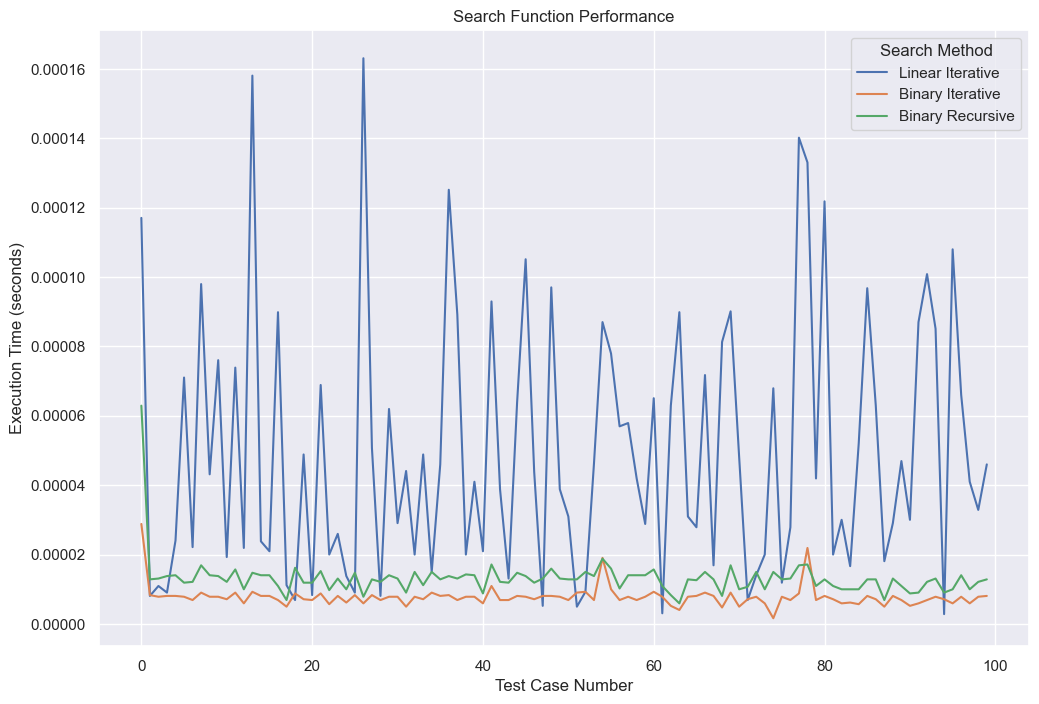

In [16]:
def generate_random_list(size, range_start, range_end):
    return sorted([random.randint(range_start, range_end) for each in range(size)])

def create_test_cases(num_cases, min_size, max_size, range_start, range_end):
    test_cases = []
    for each in range(num_cases):
        size = random.randint(min_size, max_size)
        random_list = generate_random_list(size, range_start, range_end)
        target = random.choice(random_list)
        test_cases.append((random_list, target))
    return test_cases

# Define parameters for the test cases
num_cases = 100
min_size = 100
max_size = 500
range_start = 1
range_end = 100000

# Generate the test cases
test_cases = create_test_cases(num_cases, min_size, max_size, range_start, range_end)

# Timing each function
times = {'Linear Iterative': [], 'Linear Recursive': [], 'Binary Iterative': [], 'Binary Recursive': []}

for random_list, target in test_cases:
    # Time Linear Iterative
    start = time.time()
    linearSearchIterative(random_list, target)
    times['Linear Iterative'].append(time.time() - start)
    
    # Time Linear Recursive (this is so bad that recursion depth limit will often be reached... hence, uncomment at your own discretion!!)
   # start = time.time()
   # linearSearchRecursive(random_list, target)
   # times['Linear Recursive'].append(time.time() - start)
    
    # Time Binary Iterative
    start = time.time()
    binarySearchIterative(random_list, target)
    times['Binary Iterative'].append(time.time() - start)
    
    # Time Binary Recursive
    start = time.time()
    binarySearchRecursive(random_list, target, 0, len(random_list) - 1)
    times['Binary Recursive'].append(time.time() - start)

    
# plotting
plt.figure(figsize=(12, 8))
for key, values in times.items():
    sns.lineplot(x=range(len(values)), y=values, label=key)

plt.title('Search Function Performance')
plt.xlabel('Test Case Number')
plt.ylabel('Execution Time (seconds)')
plt.legend(title='Search Method')
plt.show()

In [17]:
def sum_of_lists(N):
    total = 0
    for i in range(5):
        L = [j ^ (j >> i) for j in range(N)]
        total += sum(L)
    return total

In [18]:
%prun sum_of_lists(1000000)

         14 function calls in 0.759 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        5    0.690    0.138    0.690    0.138 3519952779.py:4(<listcomp>)
        5    0.037    0.007    0.037    0.007 {built-in method builtins.sum}
        1    0.025    0.025    0.752    0.752 3519952779.py:1(sum_of_lists)
        1    0.007    0.007    0.759    0.759 <string>:1(<module>)
        1    0.000    0.000    0.759    0.759 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

In [19]:
%memit sum_of_lists(1000000)

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


peak memory: 278.77 MiB, increment: 67.11 MiB


In [22]:
%mprun -f binarySearchRecursive binarySearchRecursive([1,2,3,4,5], 3)

Filename: /Users/josh/Desktop/Macbook Working Files/Git Repos/622-Final-Project/Task 1/Task1.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    90     42.6 MiB     42.6 MiB           1   def binarySearchRecursive(sourceList, target, left=0, right=None):
    91                                             """Uses binary search to find the target within a sorted list. Returns the position of the target, if found, and `False` otherwise. Uses a recursive approach.
    92                                             Args:
    93                                                 sourceList (list): A sorted list of `int` values
    94                                                 target (int): The `int` value that will be searched for
    95                                                 left (int, optional): The starting index of the sublist to search within. Default is 0.
    96                                                 right (int, optional): The ending index of the 

In [24]:
from memray import Tracker

def binary_search_wrapper():
    from Task1 import binarySearchRecursive  # ensure this import reflects your actual usage
    return binarySearchRecursive([1, 2, 3, 4, 5], 3)

# Specify the file name where the tracker will save the profiling data
tracker = Tracker(file_name="binary_search_memory_profile.bin")

with tracker:
    binary_search_wrapper()

# The data is now saved to "binary_search_memory_profile.bin"


In [25]:
from memray import Tracker

# Function to run all search tests under Memray's memory tracker
def run_search_tests(test_cases):
    times = {'Linear Iterative': [], 'Binary Iterative': [], 'Binary Recursive': []}
    tracker = Tracker(file_name="search_memory_profile.bin")  # Specify the output file

    with tracker:
        for random_list, target in test_cases:
            # Time Linear Iterative
            start = time.time()
            linearSearchIterative(random_list, target)
            times['Linear Iterative'].append(time.time() - start)

            # Time Binary Iterative
            start = time.time()
            binarySearchIterative(random_list, target)
            times['Binary Iterative'].append(time.time() - start)
            
            # Time Binary Recursive
            start = time.time()
            binarySearchRecursive(random_list, target, 0, len(random_list) - 1)
            times['Binary Recursive'].append(time.time() - start)

    return times

# Generate the test cases
test_cases = create_test_cases(100, 100, 500, 1, 100000)

# Run the profiling and get timing results
times = run_search_tests(test_cases)
